# Trainning the stage 1 model

In [1]:
%cd /beegfs/xg703/Vision2018-Pose/src/
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from vgg import truncated_vgg19, prestage
from model import stage1

/beegfs/xg703/Vision2018-Pose/src


## Model summary

In [2]:
truncated_vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
stage1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 512)       2048      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 256)       1179904   
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 128)       295040    
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 128)       147584    
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 128)       147584    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 128)       147584    
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 512)       66048     
__________

## Input statistics

In [4]:
def describe(X):
    print(f"min = {np.min(X)}")
    print(f"max = {np.max(X)}")
    print(f"mean = {np.mean(X)}")
    print(f"std = {np.std(X)}")

In [5]:
X = np.load("../dataset/processed/X_train.npy")
Y = np.load("../dataset/processed/Y_train.npy")

In [6]:
describe(X)

min = 0.0
max = 255.00000000000009
mean = 113.23408068573876
std = 70.64463875705135


In [7]:
describe(Y)

min = 0.0
max = 1.0
mean = 0.005252236818789604
std = 0.05139912135671097


## Running the prestage

In [8]:
# Z = prestage(X.copy()) # The intermediate result
#                        # prestage mutates its argument. For plotting purposes I'll use
#                        # a copy here to maintain the original X
# np.save("../dataset/processed/Z_train.npy", Z)
Z = np.load("../dataset/processed/Z_train.npy")

In [9]:
describe(Z) # this is why we need batch normalization

min = 0.0
max = 32186.458984375
mean = 351.165283203125
std = 726.3707885742188


## Train the model

In [10]:
history = stage1.fit(Z, Y, epochs=15, validation_split=0.2)

Train on 4000 samples, validate on 1000 samples
Epoch 1/15
4000/4000 [==============================] - 21s 5ms/step - loss: 0.0967 - mean_absolute_error: 0.0125 - val_loss: 0.0745 - val_mean_absolute_error: 0.0086
Epoch 2/15
4000/4000 [==============================] - 19s 5ms/step - loss: 0.0735 - mean_absolute_error: 0.0088 - val_loss: 0.0705 - val_mean_absolute_error: 0.0089
Epoch 3/15
4000/4000 [==============================] - 19s 5ms/step - loss: 0.0698 - mean_absolute_error: 0.0084 - val_loss: 0.0679 - val_mean_absolute_error: 0.0083
Epoch 4/15
4000/4000 [==============================] - 19s 5ms/step - loss: 0.0671 - mean_absolute_error: 0.0083 - val_loss: 0.0671 - val_mean_absolute_error: 0.0072
Epoch 5/15
4000/4000 [==============================] - 19s 5ms/step - loss: 0.0640 - mean_absolute_error: 0.0079 - val_loss: 0.0651 - val_mean_absolute_error: 0.0076
Epoch 6/15
4000/4000 [==============================] - 19s 5ms/step - loss: 0.0614 - mean_absolute_error: 0.0076 - v

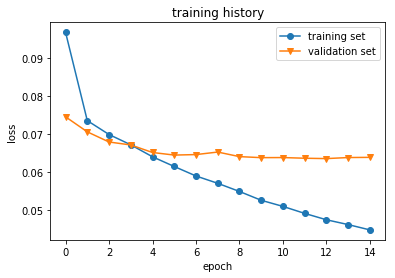

In [11]:
plt.plot(history.history['loss'], '-o')
plt.plot(history.history['val_loss'], '-v')
plt.title('training history')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'])

In [12]:
# stage1.save("../dataset/models/stage1.h5")
stage1.save_weights("../dataset/models/stage1_weights.h5")

# Prediction results on the training set

In [13]:
from config import KEYPOINTS
from plot import plot_on_img

In [14]:
expls = np.arange(5) # choose first 5 images
X_val = X[expls,...]
Y_val = Y[expls,...]

In [15]:
Z_val = prestage(X_val.copy()) # again copy to make plotting easier
Y_predict = stage1.predict(Z_val)
describe(Y_predict)

min = -0.10694033652544022
max = 1.0318337678909302
mean = 0.004141257144510746
std = 0.030949275940656662


In [16]:
expl = 0
x = X_val[expl,...] / 255.0 # scale to matplotlib's [0,1] range
y = Y_val[expl,...]
y_predict = Y_predict[expl,...]
kp = KEYPOINTS.index("left_eye")

Text(0.5,1,'Ground truth')

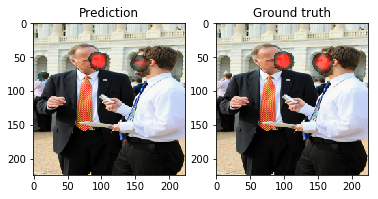

In [17]:
plt.figure()
plt.subplot(1,2,1)
plot_on_img(x, y_predict, kp)
plt.title("Prediction")
plt.subplot(1,2,2)
plot_on_img(x, y, kp)
plt.title("Ground truth")